In [7]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import joblib
import pickle

#load dataset
df = pd.read_csv('PB_All_2000_2021.csv')
df.head()

# Missing values
df.isnull().sum()
df.dtypes

# Load the model and structure
model = joblib.load("Pollution_model.pkl")
model_cols = joblib.load("model_columns.pkl")

# Let's create an user interface
print("Water Pollutants Predictor")
print("Predict the water pollutants based on Year and Station ID")

# User inputs
while True:
    try:
        year_input = int(input("Enter year(between 2000 and 2100):"))
        if 2000 <= year_input <= 2100:
            break
        else:
            print("Please enter ayear between 2000 and 2100.")
    except ValueError:
        print("Invalid input. Please enter a valid year .")


#for text input
station_id = input("Enter Station ID(default = '1'): ")    

# check if station_id is empty
if not station_id.strip():
    print("Please enter the station ID")
else:
    # Prepare the input DataFrame
    input_df = pd.DataFrame({'year': [year_input], 'id': [station_id]})
    input_encoded = pd.get_dummies(input_df, columns=['id'])
    
    # Align with model columns
    for col in model_cols:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    input_encoded = input_encoded[model_cols]

    # Predict 
    predicted_pollutants = model.predict(input_encoded)[0]
    pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

    # Display results
    print(f"\n Predicted pollutant levels for the station '{station_id}' in {year_input}:")
    for p, val in zip(pollutants, predicted_pollutants):
        print(f" - {p}:  {val:.2f}")


Water Pollutants Predictor
Predict the water pollutants based on Year and Station ID


Enter year(between 2000 and 2100): 2025
Enter Station ID(default = '1'):  22



 Predicted pollutant levels for the station '22' in 2025:
 - O2:  14.18
 - NO3:  5.01
 - NO2:  0.04
 - SO4:  128.49
 - PO4:  0.49
 - CL:  64.78


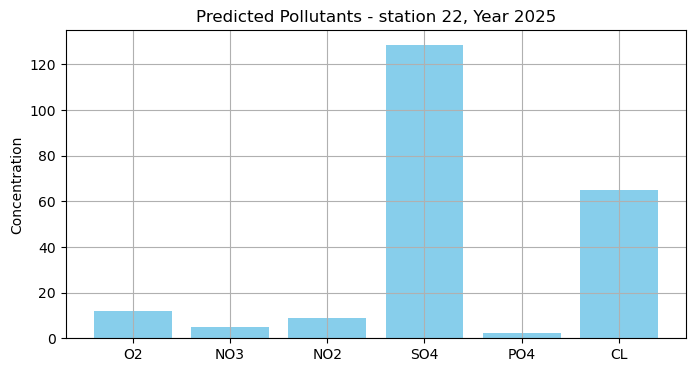

In [3]:
# Plot result
import matplotlib.pyplot as plt
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
prediction = [12.14, 5.01, 9.04, 128.49, 2.49, 64.78]
year_input = 2025
station_input = 22

plt.figure(figsize=(8,4))
plt.bar(pollutants, prediction, color='skyblue')
plt.title(f"Predicted Pollutants - station {station_input}, Year {year_input}")
plt.ylabel("Concentration")
plt.grid(True)
plt.show()